# Creating a Filter, Edge Detection

## Import resources and display image

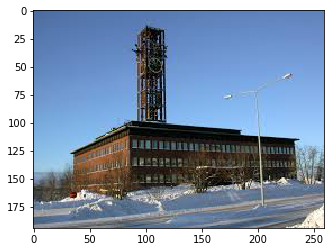

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/city_hall.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

## Convert the image to GrayScale

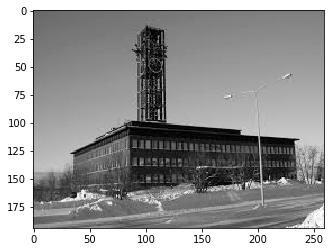

In [2]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

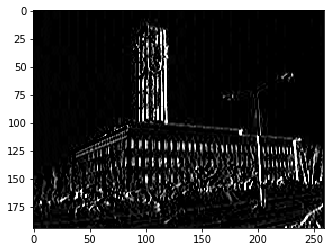

In [4]:
# sobel filter (x direction)
sobel_x = np.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])

filtered_image = cv2.filter2D(gray, -1, sobel_x)
# -1 means "output will have the same type as the input image"

plt.imshow(filtered_image, cmap='gray')

## Create binary image (high pass filters)

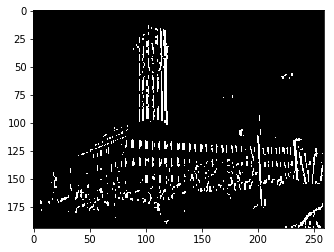

In [7]:
# Create threshold that sets all the filtered pixels to white
# Above a certain threshold

retval, binary_image = cv2.threshold(filtered_image, 100, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')
## we see the strong edges clearly

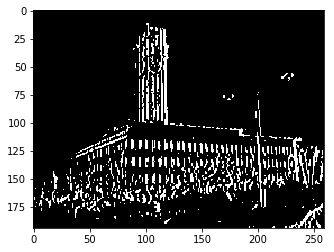

In [8]:
retval, binary_image = cv2.threshold(filtered_image, 50, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')
## we see the strong edges clearly

There are many high frequency noises so the images are not useful.

low filters => normalize

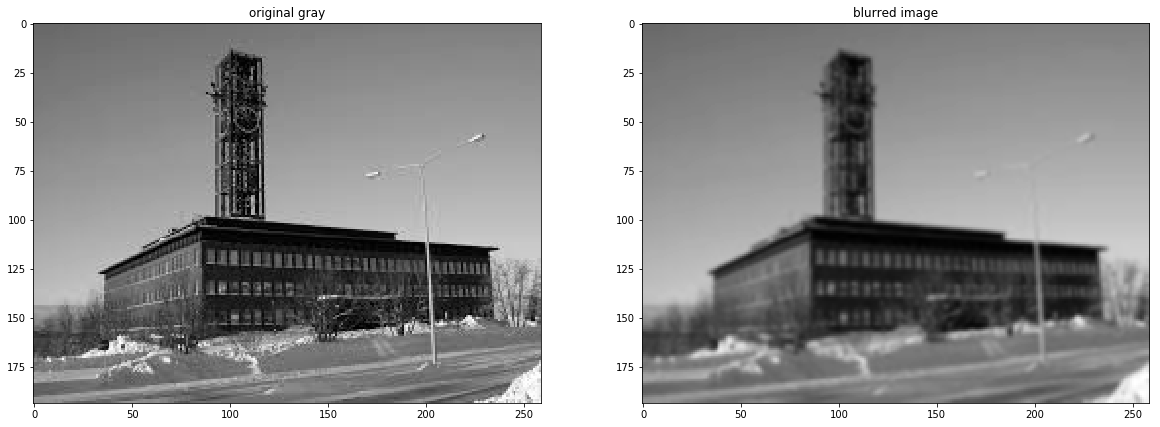

In [10]:
gray_blur = cv2.GaussianBlur(gray, (5,5), 0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title('original gray')
ax1.imshow(gray, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(gray_blur, cmap='gray')



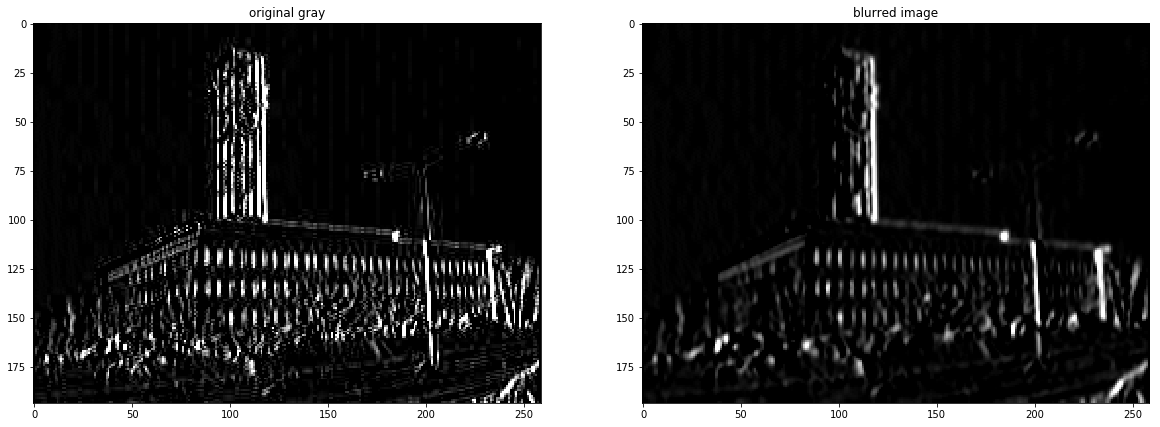

In [11]:
sobel_x = np.array([[-2, 0, 2], [-1, 0, 1], [-2, 0, 2]])

filtered = cv2.filter2D(gray, -1, sobel_x)
filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_x)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title('original gray')
ax1.imshow(filtered, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(filtered_blurred, cmap='gray')

Normal Process
Low Filter -> High Filter

# Just Use 'Canny Edge' Detection 
#### 1- filter out using Gaussian Blur
#### 2- Finds the strength edges using Sobel Filters
#### 3- Applies non-maximum suppression to isolate the strongest eges
#### 4- hysteresis(double threashold) -> eliminate weak edges and noise, isolate edges that are part of an object boundary

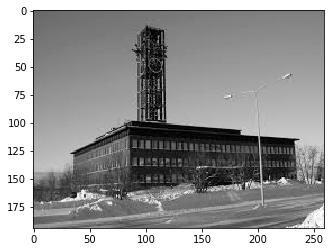

In [14]:
gray
plt.imshow(gray, cmap='gray')

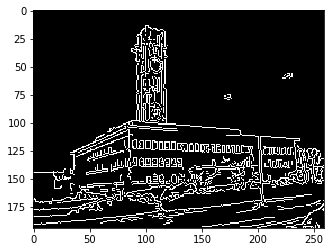

In [16]:
lower = 120
upper = 240 # Use one to three ratio

edges = cv2.Canny(gray, lower, upper)
plt.imshow(edges, cmap='gray')

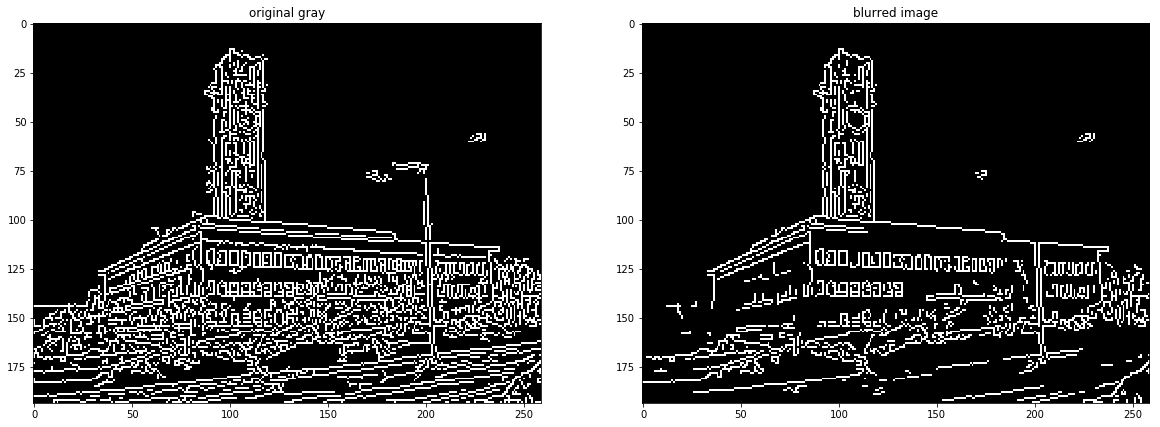

In [17]:
# Try canny using "wide" and "tight"
wide = cv2.Canny(gray, 30, 100)
tight = cv2.Canny(gray, 180, 240)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title('original gray')
ax1.imshow(wide, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(tight, cmap='gray')